## Bank Term Deposit Marketing

##### Input variables:
Bank client data:<br>
1. Age<br>
2. Job : type of job<br>
3. Marital: marital status<br>
4. Education: education level<br>
5. Default: has credit in default?<br>
6. Balance<br>
7. Housing: has housing loan?<br>
8. Loan: has personal loan?<br><br>

Related with the last contact of the current campaign:<br>
9. Contact: contact communication type<br>
10. Month: last contact month of year<br>
11. Day: last contact day of the month<br>
12. Duration: last contact duration, in seconds<br><br>

Other attributes:<br>
13. Campaign: number of contacts performed during this campaign and for this client<br>
14. Pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted)<br>
15. Previous: number of contacts performed before this campaign and for this client<br>
16. Poutcome: outcome of the previous marketing campaign<br><br>

##### Output variable (desired target):
Deposit: has the client subscribed a term deposit?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('bone')
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('bank.csv')

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
data.duplicated().sum()

0

In [6]:
print('Number of "unknown" in each row:')
print(data[data == 'unknown'].count()[data[data == 'unknown'].count()>0])

Number of "unknown" in each row:
job            70
education     497
contact      2346
poutcome     8326
dtype: int64


In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [8]:
df = data.copy()

##### Categorical Data

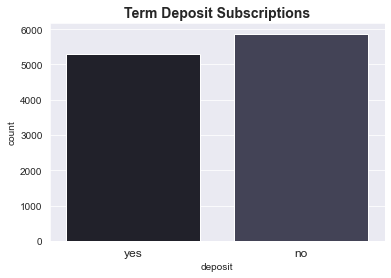

In [9]:
sns.countplot(df['deposit'])
plt.title('Term Deposit Subscriptions', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.savefig('BM_1', bbox_inches='tight', dpi=150)
plt.show()

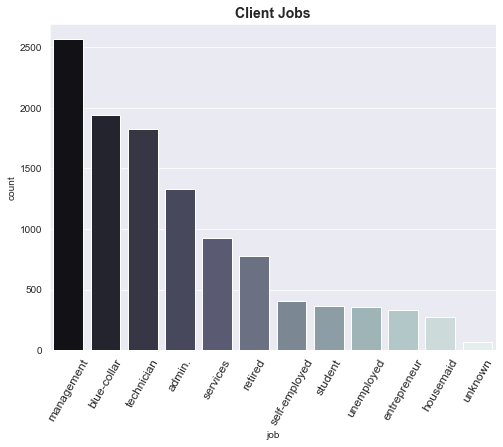

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(df['job'], order=df['job'].value_counts().sort_values(ascending=False).index, palette='bone')
plt.title('Client Jobs', fontsize=14, weight='bold')
plt.xticks(fontsize=12,rotation=60)
plt.savefig('BM_2', bbox_inches='tight', dpi=200)
plt.show()

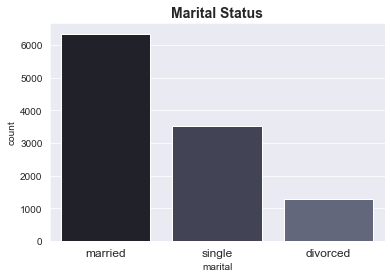

In [11]:
sns.countplot(df['marital'])
plt.title('Marital Status', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.savefig('BM_3', bbox_inches='tight', dpi=150)
plt.show()

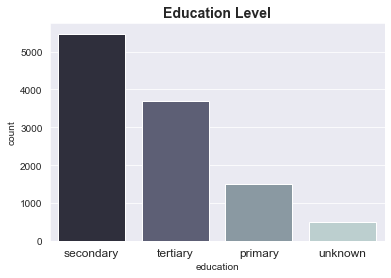

In [12]:
sns.countplot(df['education'], palette='bone')
plt.title('Education Level', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.savefig('BM_4', bbox_inches='tight', dpi=150)
plt.show()

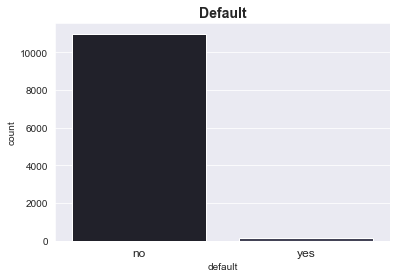

In [13]:
sns.countplot(df['default'])
plt.title('Default', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.savefig('BM_5', bbox_inches='tight', dpi=150)
plt.show()

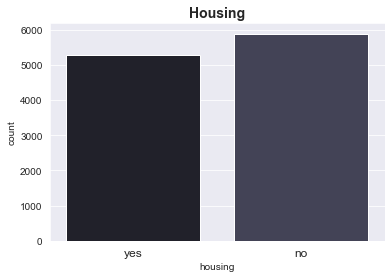

In [14]:
sns.countplot(df['housing'])
plt.title('Housing', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.savefig('BM_6', bbox_inches='tight', dpi=150)
plt.show()

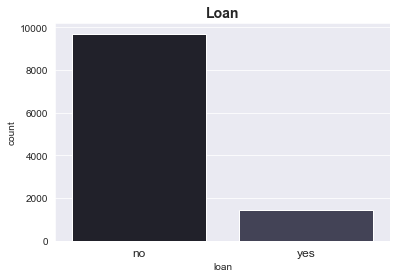

In [15]:
sns.countplot(df['loan'])
plt.title('Loan', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.savefig('BM_7', bbox_inches='tight', dpi=150)
plt.show()

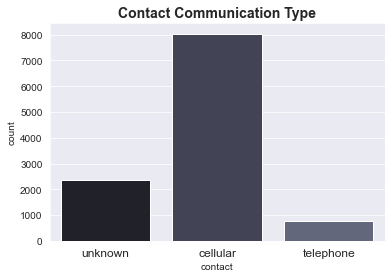

In [16]:
sns.countplot(df['contact'])
plt.title('Contact Communication Type', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.savefig('BM_8', bbox_inches='tight', dpi=150)
plt.show()

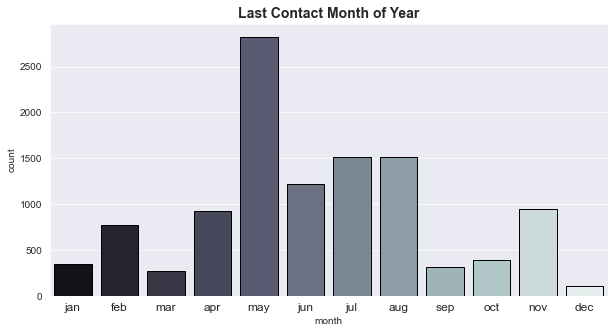

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(df['month'], order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
              palette='bone', edgecolor='black')
plt.title('Last Contact Month of Year', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.savefig('BM_9', bbox_inches='tight', dpi=150)
plt.show()

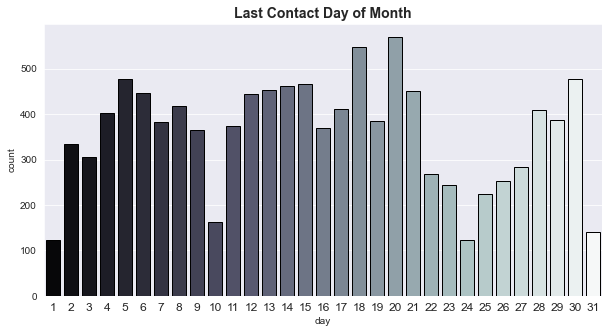

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(df['day'], palette='bone', edgecolor='black')
plt.title('Last Contact Day of Month', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.savefig('BM_10', bbox_inches='tight', dpi=150)
plt.show()

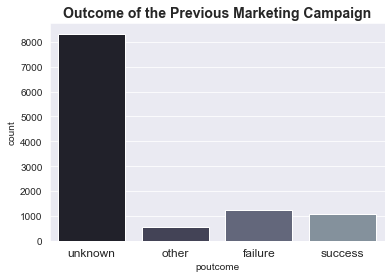

In [19]:
sns.countplot(df['poutcome'])
plt.title('Outcome of the Previous Marketing Campaign', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.savefig('BM_11', bbox_inches='tight', dpi=150)
plt.show()

##### Numeric Data

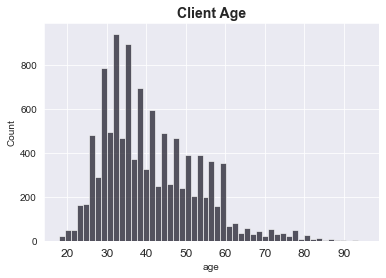

In [20]:
sns.histplot(df['age'])
plt.title('Client Age', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.savefig('BM_12', bbox_inches='tight', dpi=150)
plt.show()

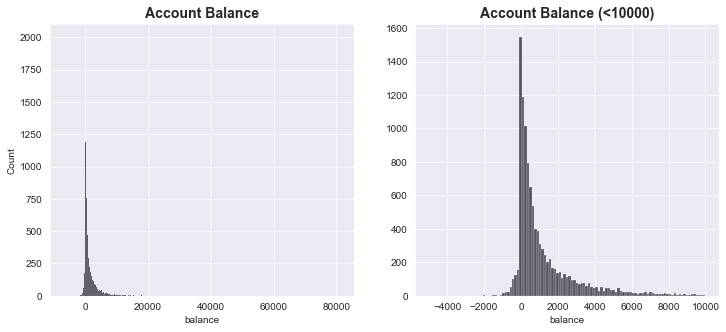

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.histplot(df['balance'])
plt.title('Account Balance',fontsize=14, weight='bold')
plt.subplot(122)
sns.histplot(df['balance'], binrange=(-5000,10000))
plt.title('Account Balance (<10000)',fontsize=14, weight='bold')
plt.ylabel('')
plt.savefig('BM_13', bbox_inches='tight', dpi=150)
plt.show()

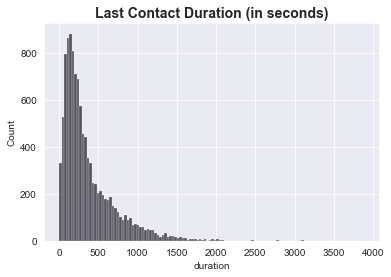

In [22]:
sns.histplot(df['duration'])
plt.title('Last Contact Duration (in seconds)', fontsize=14, weight='bold')
plt.savefig('BM_14', bbox_inches='tight', dpi=150)
plt.show()

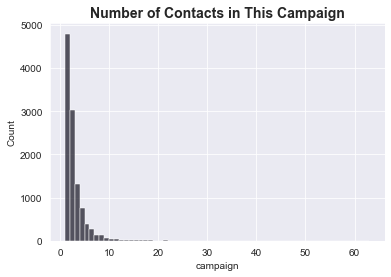

In [23]:
sns.histplot(df['campaign'], binwidth=1)
plt.title('Number of Contacts in This Campaign', fontsize=14, weight='bold')
plt.savefig('BM_15', bbox_inches='tight', dpi=150)
plt.show()

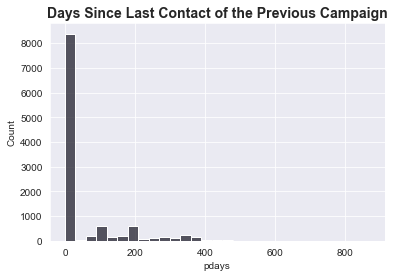

In [24]:
sns.histplot(df['pdays'], binwidth=30)
plt.title('Days Since Last Contact of the Previous Campaign', fontsize=14, weight='bold')
plt.savefig('BM_16', bbox_inches='tight', dpi=150)
plt.show()

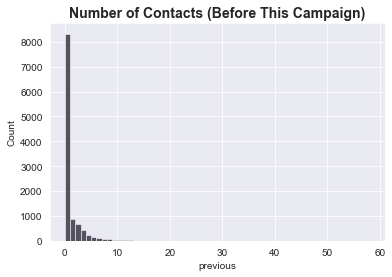

In [25]:
sns.histplot(df['previous'], binwidth=1)
plt.title('Number of Contacts (Before This Campaign)', fontsize=14, weight='bold')
plt.savefig('BM_17', bbox_inches='tight', dpi=150)

##### Age

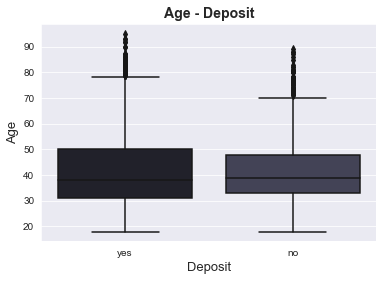

,count,mean,std,min,25%,50%,75%,max
deposit,,,,,,,,
no,5873.0,40.837391,10.264815,18.0,33.0,39.0,48.0,89.0
yes,5289.0,41.670070,13.497781,18.0,31.0,38.0,50.0,95.0


In [26]:
sns.boxplot(x= df['deposit'], y = df['age'])
plt.title('Age - Deposit', fontsize=14, weight='bold')
plt.xlabel('Deposit', fontsize=13)
plt.ylabel('Age', fontsize=13)
plt.savefig('BM_18', bbox_inches='tight', dpi=150)
plt.show()
pd.DataFrame(df['age'].groupby(df['deposit']).describe())

選擇訂閱定存之客戶與拒絕訂閱之客戶的平均年齡差距不顯著，僅有一歲之差。

##### Balance

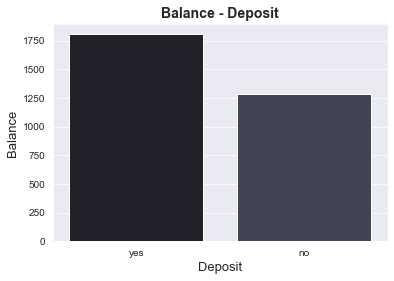

In [27]:
sns.barplot(x= df['deposit'], y = df['balance'], ci=None)
plt.title('Balance - Deposit', fontsize=14, weight='bold')
plt.xlabel('Deposit', fontsize=13)
plt.ylabel('Balance', fontsize=13)
plt.savefig('BM_19', bbox_inches='tight', dpi=150)
plt.show()

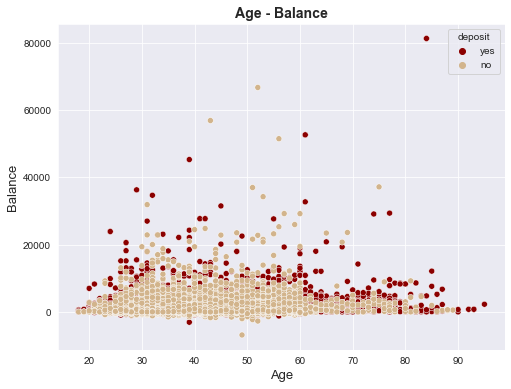

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['age'], y=df['balance'], hue=df['deposit'], palette=['darkred','tan'])
plt.title('Age - Balance', fontsize=14, weight='bold')
plt.xlabel('Age', fontsize=13)
plt.ylabel('Balance', fontsize=13)
plt.savefig('BM_20', bbox_inches='tight', dpi=150)
plt.show()

訂閱定存之客戶的平均帳戶餘額較高，與拒絕訂閱之客戶相差大約200左右。

##### Job

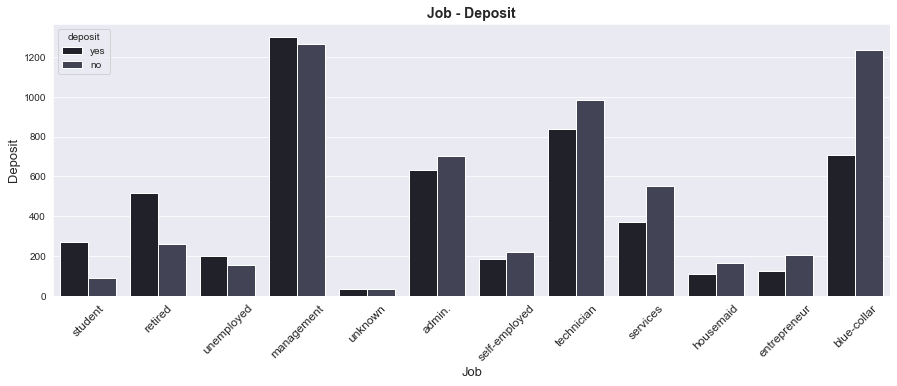

student          0.7472
retired          0.6632
unemployed       0.5658
management       0.5070
unknown          0.4857
admin.           0.4730
self-employed    0.4617
technician       0.4608
services         0.3998
housemaid        0.3978
entrepreneur     0.3750
blue-collar      0.3642
Name: job, dtype: float64

In [29]:
rate_job = (df['job'][df['deposit'] == 'yes'].value_counts() /
            df['job'].value_counts()).round(4).sort_values(ascending=False)

plt.figure(figsize=(15,5))
sns.countplot(df['job'], hue=df['deposit'],order=rate_job.index)
plt.title('Job - Deposit', fontsize=14, weight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Job', fontsize=13)
plt.ylabel('Deposit', fontsize=13)
plt.savefig('BM_21', bbox_inches='tight', dpi=150)
plt.show()
rate_job

依職業別來看個職業的訂閱率，前三高的是學生(74.7%)、退休者(66.3%)、無業者(56.6%)；前三低的是藍領階級(36.4%)、企業家(37.5%)、女管家(39.8%)。

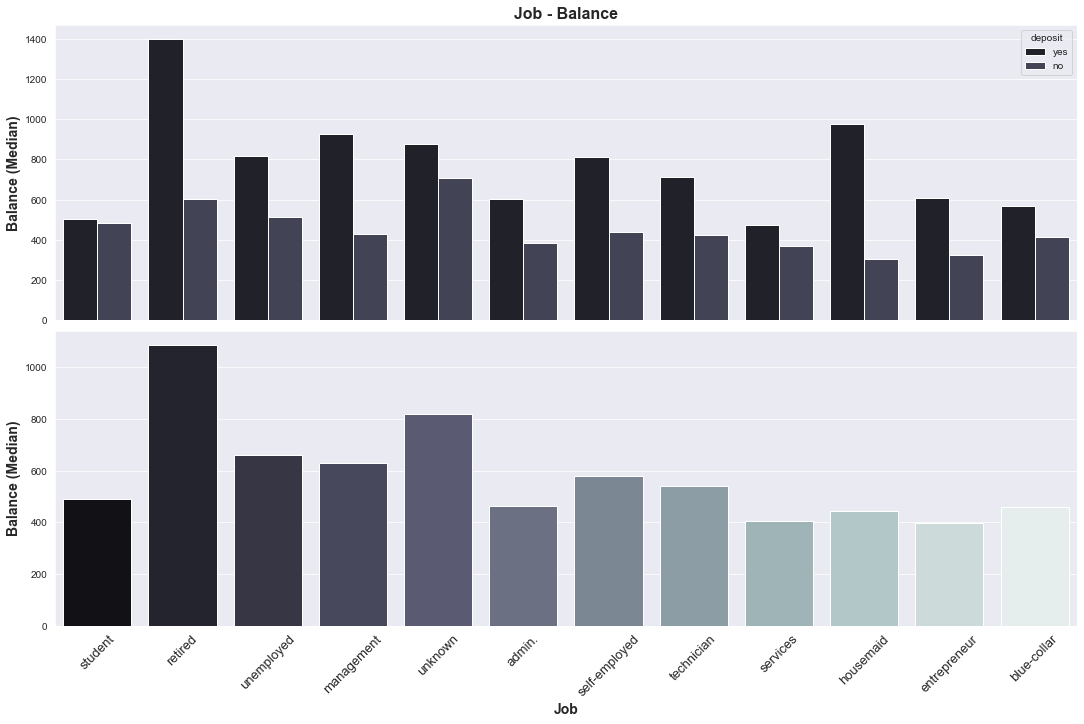

In [30]:
from numpy import median

plt.figure(figsize=(15,10))
plt.subplot(211)
sns.barplot(x=df['job'], y=df['balance'], hue=df['deposit'], order=rate_job.index, estimator=median, ci=None)
plt.title('Job - Balance', fontsize=16, weight='bold')
plt.xticks([])
plt.xlabel('')
plt.ylabel('Balance (Median)', fontsize=14, weight='bold')

plt.subplot(212)
sns.barplot(x=df['job'], y=df['balance'], order=rate_job.index, palette='bone', estimator=median, ci=None)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel('Job', fontsize=14, weight='bold')
plt.ylabel('Balance (Median)', fontsize=14, weight='bold')
plt.tight_layout(pad=.5)
plt.savefig('BM_22', bbox_inches='tight', dpi=150)
plt.show()

各職業的平均帳戶餘額之排名與職業訂閱率排名不同，若不計入未知項，訂閱率最高的學生族群平均帳戶餘額僅排第六，退休者的平均帳戶餘額最高，無業者則排名第八。

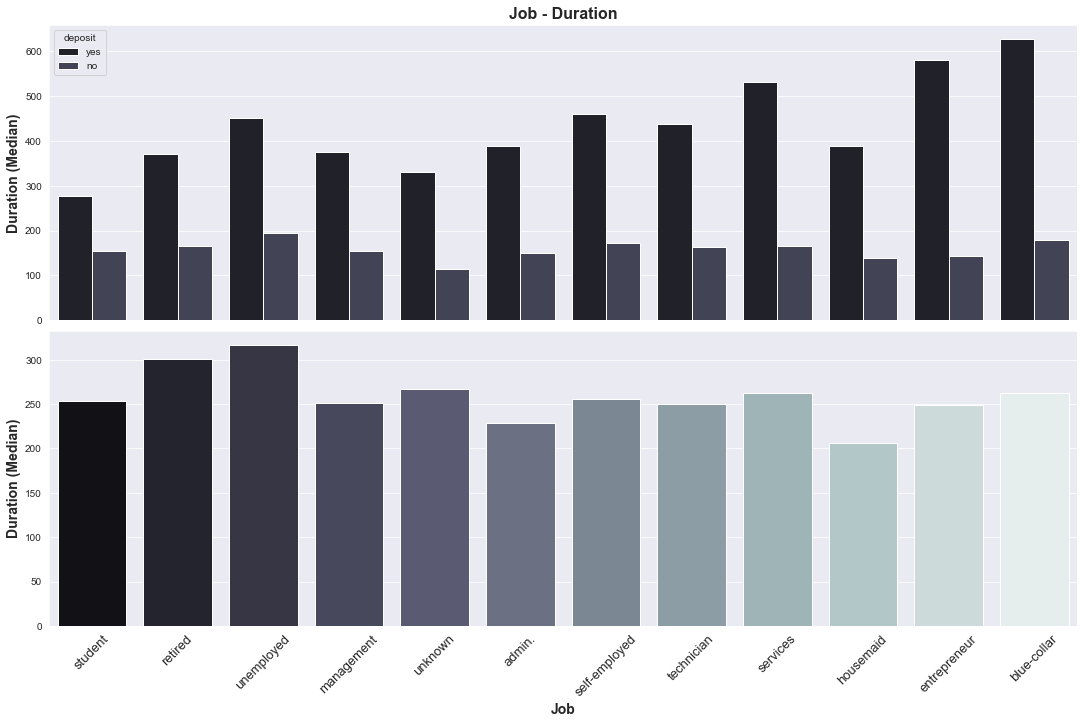

In [31]:
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.barplot(x=df['job'], y=df['duration'], hue=df['deposit'], order=rate_job.index, estimator=median, ci=None)
plt.title('Job - Duration', fontsize=16, weight='bold')
plt.xticks([])
plt.xlabel('')
plt.ylabel('Duration (Median)', fontsize=14, weight='bold')

plt.subplot(212)
sns.barplot(x=df['job'], y=df['duration'], order=rate_job.index, estimator=median, ci=None, palette='bone')
plt.xticks(rotation=45, fontsize=13)
plt.xlabel('Job', fontsize=14, weight='bold')
plt.ylabel('Duration (Median)', fontsize=14, weight='bold')
plt.tight_layout(pad=.5)
plt.savefig('BM_23', bbox_inches='tight', dpi=150)
plt.show()

各職業的行銷電話接聽時間差距不大(此變數可看作客戶對定存方案的興趣程度指標)，所有職業的訂閱客戶之接聽時間皆高於無定閱客戶。

##### Marital

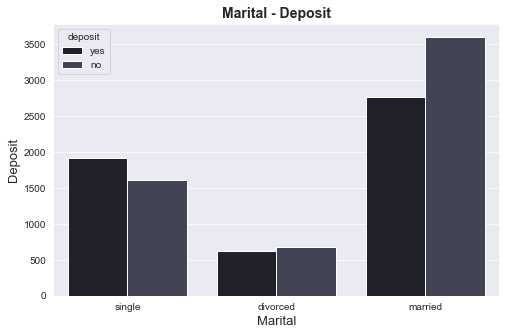

single      0.543491
divorced    0.481052
married     0.433790
Name: marital, dtype: float64

In [32]:
rate_marital = (df['marital'][df['deposit'] == 'yes'].value_counts() /
                df['marital'].value_counts()).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.countplot(df['marital'], hue=df['deposit'],order=rate_marital.index)
plt.title('Marital - Deposit', fontsize=14, weight='bold')
plt.xlabel('Marital', fontsize=13)
plt.ylabel('Deposit', fontsize=13)
plt.savefig('BM_24', bbox_inches='tight', dpi=150)
plt.show()
rate_marital

若依婚姻狀態看訂閱率，最高者為單身族群，離婚者次之，最後則是已婚者。

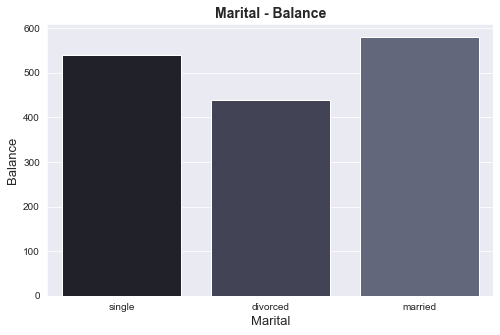

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['marital'], y=df['balance'],  order=rate_marital.index, estimator=median, ci=None)
plt.title('Marital - Balance', fontsize=14, weight='bold')
plt.xlabel('Marital', fontsize=13)
plt.ylabel('Balance', fontsize=13)
plt.savefig('BM_25', bbox_inches='tight', dpi=150)
plt.show()

在帳戶餘額方面，平均餘額最高者是已婚者，離婚者最低。

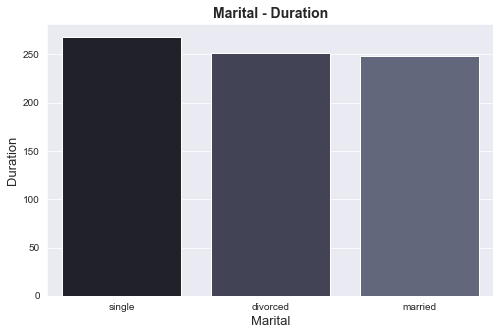

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['marital'], y=df['duration'], order=rate_marital.index, estimator=median, ci=None)
plt.title('Marital - Duration', fontsize=14, weight='bold')
plt.xlabel('Marital', fontsize=13)
plt.ylabel('Duration', fontsize=13)
plt.savefig('BM_26', bbox_inches='tight', dpi=150)
plt.show()

三種婚姻狀況的電話接聽時間無顯著差距。

<Figure size 576x432 with 0 Axes>

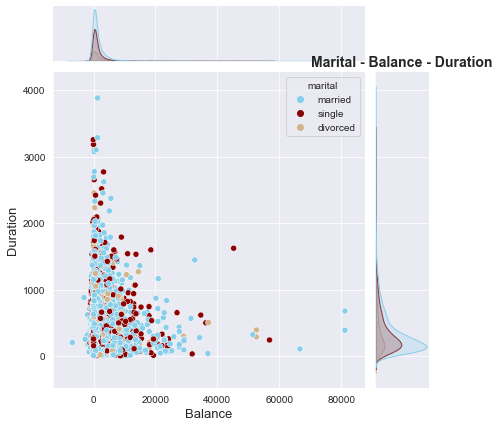

In [35]:
plt.figure(figsize=(8,6))
h = sns.jointplot(x=df['balance'], y=df['duration'], hue=df['marital'], palette=['skyblue','darkred','tan'])
plt.title('Marital - Balance - Duration', fontsize=14, weight='bold')
h.set_axis_labels('Balance', 'Duration', fontsize=13)
plt.savefig('BM_27', bbox_inches='tight', dpi=150)
plt.show()

##### Education

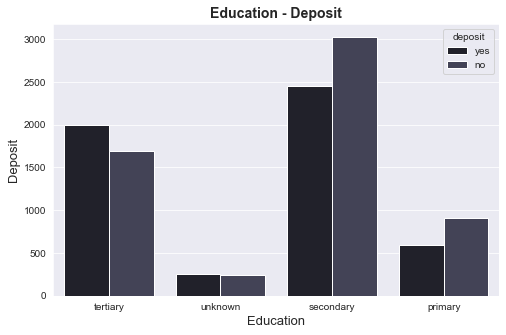

tertiary     0.541068
unknown      0.507042
secondary    0.447407
primary      0.394000
Name: education, dtype: float64

In [36]:
rate_edu = (df['education'][df['deposit'] == 'yes'].value_counts() / df['education'].value_counts()).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.countplot(df['education'], hue=df['deposit'],order=rate_edu.index)
plt.title('Education - Deposit', fontsize=14, weight='bold')
plt.xlabel('Education', fontsize=13)
plt.ylabel('Deposit', fontsize=13)
plt.savefig('BM_28', bbox_inches='tight', dpi=150)
plt.show()
rate_edu

若未考慮未知項，教育程度與訂閱率呈正向關係，意即教育程度愈高之客戶對於定存的接受度愈高。

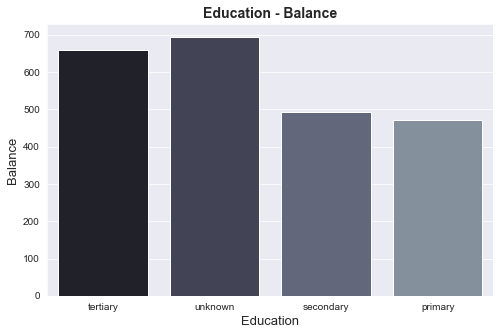

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['education'], y=df['balance'], order=rate_edu.index, estimator=median, ci=None)
plt.title('Education - Balance', fontsize=14, weight='bold')
plt.xlabel('Education', fontsize=13)
plt.ylabel('Balance', fontsize=13)
plt.savefig('BM_29', bbox_inches='tight', dpi=150)
plt.show()

教育程度也與帳戶餘額成正比。

##### Default

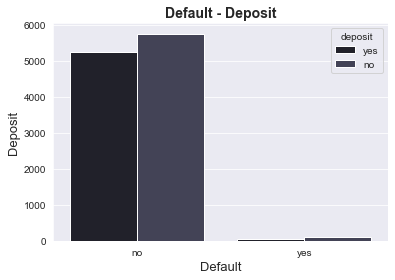

no     0.476351
yes    0.309524
Name: default, dtype: float64

In [38]:
rate_def = (df['default'][df['deposit'] == 'yes'].value_counts() / df['default'].value_counts()).sort_values(ascending=False)

sns.countplot(df['default'], hue=df['deposit'],order=rate_def.index)
plt.title('Default - Deposit', fontsize=14, weight='bold')
plt.xlabel('Default', fontsize=13)
plt.ylabel('Deposit', fontsize=13)
plt.savefig('BM_30', bbox_inches='tight', dpi=150)
plt.show()
rate_def

In [39]:
df['default'].value_counts()

no     10994
yes      168
Name: default, dtype: int64

無信用不良紀錄的客戶有更高的訂閱率，可能與理財觀念或財務狀況有關，但有信用不良紀錄的客戶數量僅168位。

##### Housing

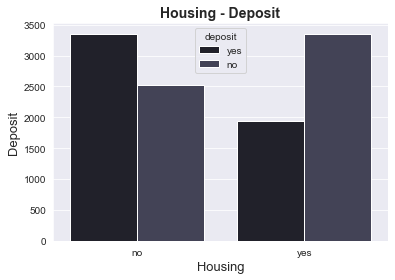

no     0.570311
yes    0.366408
Name: housing, dtype: float64

In [40]:
rate_house = (df['housing'][df['deposit'] == 'yes'].value_counts() / df['housing'].value_counts()).sort_values(ascending=False)

sns.countplot(df['housing'], hue=df['deposit'],order=rate_house.index)
plt.title('Housing - Deposit', fontsize=14, weight='bold')
plt.xlabel('Housing', fontsize=13)
plt.ylabel('Deposit', fontsize=13)
plt.savefig('BM_31', bbox_inches='tight', dpi=150)
plt.show()
rate_house

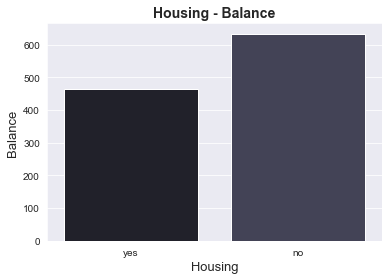

In [41]:
sns.barplot(x=df['housing'], y=df['balance'], estimator=median, ci=None)
plt.title('Housing - Balance', fontsize=14, weight='bold')
plt.xlabel('Housing', fontsize=13)
plt.ylabel('Balance', fontsize=13)
plt.savefig('BM_32', bbox_inches='tight', dpi=150)

無房貸的客戶有較高的訂閱率，平均帳戶結餘也較高，有可能是因擁有較多可支配現金，故定存意願較高。

##### Loan

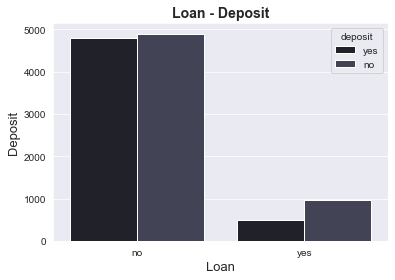

no     0.495259
yes    0.331507
Name: loan, dtype: float64

In [42]:
rate_loan = (df['loan'][df['deposit'] == 'yes'].value_counts() / df['loan'].value_counts()).sort_values(ascending=False)

sns.countplot(df['loan'], hue=df['deposit'],order=rate_loan.index)
plt.title('Loan - Deposit', fontsize=14, weight='bold')
plt.xlabel('Loan', fontsize=13)
plt.ylabel('Deposit', fontsize=13)
plt.savefig('BM_33', bbox_inches='tight', dpi=150)
plt.show()
rate_loan

無貸款之客戶訂閱率較高，原因可能同於無房貸之客戶，因可支配現金較多而對定存的接受度較高。

#### Marketing Campaign

##### Contact

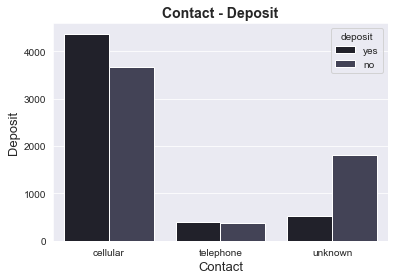

cellular     0.543273
telephone    0.503876
unknown      0.225916
Name: contact, dtype: float64

In [43]:
rate_con = (df['contact'][df['deposit'] == 'yes'].value_counts() / df['contact'].value_counts()).sort_values(ascending=False)

sns.countplot(df['contact'], hue=df['deposit'],order=rate_con.index)
plt.title('Contact - Deposit', fontsize=14, weight='bold')
plt.xlabel('Contact', fontsize=13)
plt.ylabel('Deposit', fontsize=13)
plt.savefig('BM_34', bbox_inches='tight', dpi=150)
plt.show()
rate_con

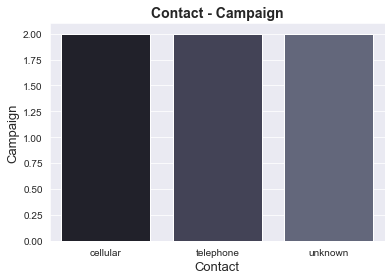

In [44]:
sns.barplot(x=df['contact'], y=df['campaign'], order=rate_con.index, estimator=median)
plt.title('Contact - Campaign', fontsize=14, weight='bold')
plt.xlabel('Contact', fontsize=13)
plt.ylabel('Campaign', fontsize=13)
plt.savefig('BM_36', bbox_inches='tight', dpi=150)
plt.show()

若以行銷電話的聯繫方式區分，以手機聯絡之客戶的訂閱率比以電話聯絡的客戶高出4%。<br>
兩種聯繫方式的客戶所接到的行銷電話平均(中位數)皆為2通。

##### Day & Month

In [45]:
df['deposit_01'] = np.where(df['deposit'] == 'yes', 1, 0)

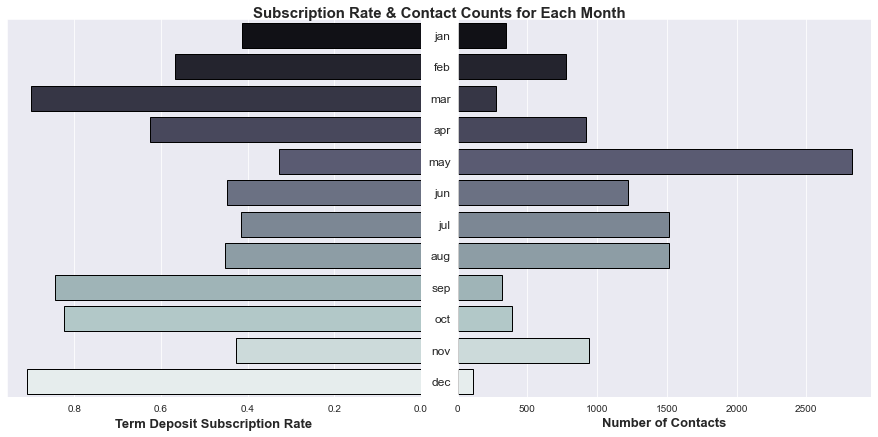

In [46]:
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

plt.figure(figsize=(12,6))
plt.subplot(121)
fig = sns.barplot(x=df['deposit_01'], y=df['month'], order=month_order,palette='bone', edgecolor='black', ci=None)
fig.invert_xaxis()
plt.xlabel('Term Deposit Subscription Rate', fontsize=13, weight='bold')
plt.ylabel('')
plt.yticks([])
plt.subplot(122)
fig1 = sns.countplot(y=df['month'], order=month_order,palette='bone', edgecolor='black')
plt.xlabel('Number of Contacts', fontsize=13, weight='bold')
plt.ylabel('')
plt.yticks(fontsize=12)
plt.suptitle('Subscription Rate & Contact Counts for Each Month', fontsize=15, weight='bold')
plt.tight_layout(pad=0)
plt.subplots_adjust(top=0.95)
plt.savefig('BM_37', bbox_inches='tight', dpi=200)
plt.show()

In [47]:
rate_month = (df['month'][df['deposit'] == 'yes'].value_counts() / df['month'].value_counts())[month_order]
count_month = df['month'].value_counts()[month_order]
print('Correlation Coefficient:', rate_month.corr(count_month))

Correlation Coefficient: -0.7453314120037687


以最後接到行銷電話的月份區分，三、九、十以及十二月的客戶有較高的訂閱率(80%以上)，訂閱率最低的月份則是五月。但須注意的是，訂閱率較高之月份的樣本數較少，而訂閱率最低之月份的樣本數最高，依相關係數來看，訂閱率與樣本數存在顯著的負向關係。

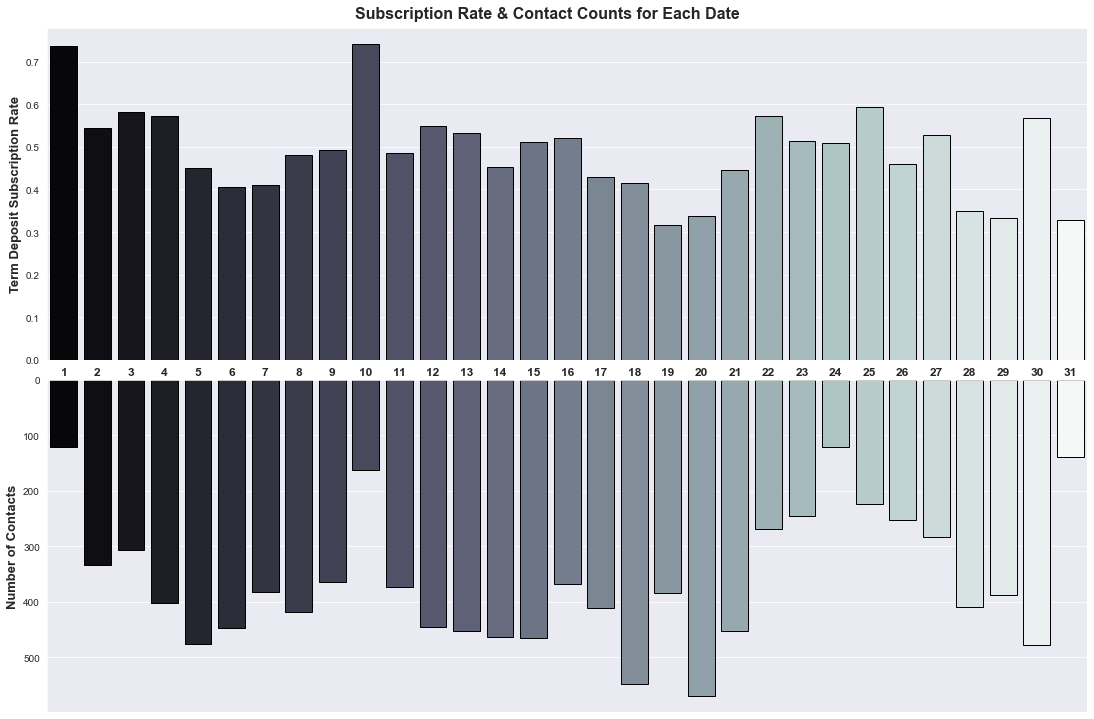

In [48]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
fig = sns.barplot(y=df['deposit_01'], x=df['day'], palette='bone', edgecolor='black', ci=None)
plt.ylabel('Term Deposit Subscription Rate', fontsize=13, weight='bold')
plt.xlabel('')
plt.xticks(fontsize=12, weight='bold')
plt.subplot(2,1,2)
fig1 = sns.countplot(x=df['day'], palette='bone', edgecolor='black')
fig1.invert_yaxis()
plt.ylabel('Number of Contacts', fontsize=13, weight='bold')
plt.xticks([])
plt.xlabel('')
plt.suptitle('Subscription Rate & Contact Counts for Each Date', fontsize=16, weight='bold')
plt.tight_layout(pad=0)
plt.subplots_adjust(top=0.95)
plt.savefig('BM_38', bbox_inches='tight', dpi=200)
plt.show()

在日期方面，最後一通行銷電話接聽日期在一號與十號有最佳的訂閱率，但與月份變數的情況相似，即此二日雖有最佳的訂閱率，但樣本數低於其他日期。

##### Duration

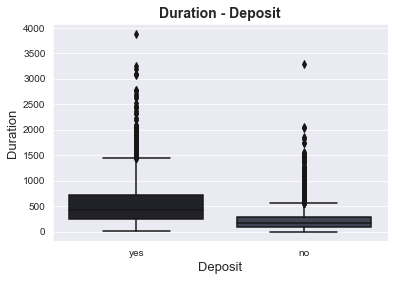

In [49]:
sns.boxplot(df['deposit'], df['duration'])
plt.title('Duration - Deposit', fontsize=14, weight='bold')
plt.xlabel('Deposit', fontsize=13)
plt.ylabel('Duration', fontsize=13)
plt.savefig('BM_39', bbox_inches='tight', dpi=150)
plt.show()

選擇定存之客戶的平均通話時間(最近一次通話)高於拒絕定存的客戶，可看出通話時間代表客戶對於定存行銷的感興趣程度。

##### Campaign

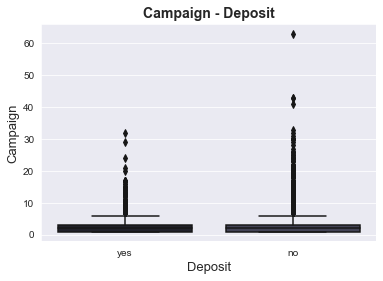

,count,mean,std,min,25%,50%,75%,max
deposit,,,,,,,,
no,5873.0,2.839264,3.244474,1.0,1.0,2.0,3.0,63.0
yes,5289.0,2.141047,1.921826,1.0,1.0,2.0,3.0,32.0


In [50]:
sns.boxplot(x=df['deposit'], y=df['campaign'])
plt.title('Campaign - Deposit', fontsize=14, weight='bold')
plt.xlabel('Deposit', fontsize=13)
plt.ylabel('Campaign', fontsize=13)
plt.savefig('BM_40', bbox_inches='tight', dpi=150)
plt.show()
df['campaign'].groupby(df['deposit']).describe()

不論是否選擇定存，大多數客戶接到的行銷電話皆為1到3通，但有部分的拒絕定存客戶接到40通以上的行銷電話。<br>
雖然依結果來看，拒絕定存的客戶接到的行銷電話平均次數較高(0.7次)，但我認為不能以此斷定接到較多電話的客戶就會偏向選擇不定存，而是可能因客戶拒絕定存行銷而導致後續持續接到行銷電話；而選擇定存的客戶則是因行銷成功後便從行銷名單中移除。

##### Previous

In [51]:
df['previous_1'] = np.where(df['previous'] > 0, 'yes', 'no')

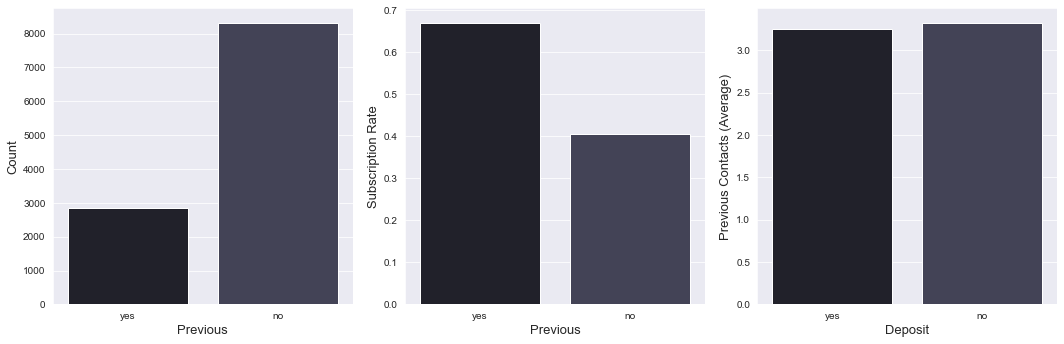

In [52]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot(df['previous_1'], order=['yes','no'])
plt.xlabel('Previous', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.subplot(132)
sns.barplot(x=df['previous_1'], y=df['deposit_01'], order=['yes','no'], ci=None)
plt.xlabel('Previous', fontsize=13)
plt.ylabel('Subscription Rate', fontsize=13)
plt.subplot(133)
sns.barplot(x=df['deposit'], y=df['previous'][df['previous']!=0], ci=None)
plt.xlabel('Deposit', fontsize=13)
plt.ylabel('Previous Contacts (Average)', fontsize=13)
plt.tight_layout(pad=1.5)
plt.savefig('BM_41', bbox_inches='tight', dpi=150)
plt.show()

此項變數為客戶在該次行銷活動前所接到的行銷電話次數，大部分的客戶都未接到行銷電話，若將此變數分為是否有接收到行銷電話，可看出在此次行銷活動前就有接到行銷電話之客戶在這次的行銷活動中有較高的訂閱率。<br>
圖三是將此次行銷活動前「有接到行銷電話」之客戶依此次是否訂閱定存方案來區分，計算兩者接到行銷電話的平均次數，可看出兩者的平均次數大致相等。<br>
綜上所述，在前一次行銷活動就被推銷的客戶對於此次的行銷有較高的接受度，至於前次行銷活動的聯繫次數與此次的訂閱意願則沒有顯著關聯。

##### Pdays

In [53]:
sum(df['pdays'] == -1)

8324

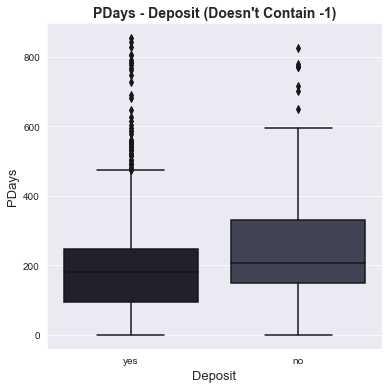

In [54]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['deposit'], y=df['pdays'][df['pdays']!= -1])
plt.title("PDays - Deposit (Doesn't Contain -1)", fontsize=14, weight='bold')
plt.xlabel('Deposit', fontsize=13)
plt.ylabel('PDays', fontsize=13)
plt.savefig('BM_42', bbox_inches='tight', dpi=150)
plt.show()

此變數是前次行銷活動的最後一次聯繫距今經過的天數，但因大部分(8000左右)客戶在前次行銷活動並未接到推銷電話，故只討論有被推銷之客戶的效果，可看到此次拒絕定存的客戶，其在此次行銷活動前的最後聯繫日距今累計的平均天數較長。

##### Poutcom

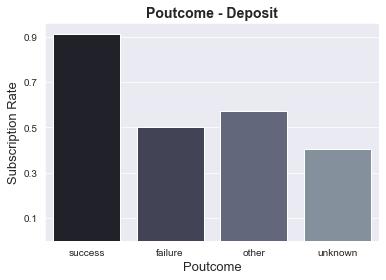

poutcome  deposit
success   yes         978
          no           93
failure   yes         618
          no          610
other     yes         307
          no          230
unknown   no         4940
          yes        3386
dtype: int64


In [55]:
sns.barplot(x=df['poutcome'], y=df['deposit_01'], order=['success','failure','other','unknown'], ci=None)
plt.title("Poutcome - Deposit", fontsize=14, weight='bold')
plt.yticks(np.arange(0.1,1,0.2))
plt.xlabel('Poutcome', fontsize=13)
plt.ylabel('Subscription Rate', fontsize=13)
plt.savefig('BM_43', bbox_inches='tight', dpi=150)
plt.show()
print(df[['poutcome','deposit']].value_counts()[['success','failure','other','unknown']])

有八千多位客戶在上次行銷活動的結果為未知，可能是在上次行銷活動時未接收到推銷訊息。而上次活動中成功被推銷的客戶中，有九成左右也接受這次的定存推銷。在上次行銷中未接受推銷的客戶中，則有一半左右接受了這次的定存推銷。

### Data preprocessing

In [56]:
df1 = df.copy()

In [57]:
display(df1.head())
display(df1.describe())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_01,previous_1
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1,no
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1,no
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1,no
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1,no
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,1,no


,age,balance,day,duration,campaign,pdays,previous,deposit_01
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [58]:
df1[df1 == 'unknown'].count()[df1[df1 == 'unknown'].count() != 0]

job            70
education     497
contact      2346
poutcome     8326
dtype: int64

In [59]:
df1['job'][(df1['job'] == 'unknown') & (df1['education'] == 'unknown')].count()

39

In [60]:
df1.drop(df1[(df1['job'] == 'unknown') & (df1['education'] == 'unknown')].index, axis=0, inplace=True)
df1[df1 == 'unknown'].count()[df1[df1 == 'unknown'].count() != 0]

job            31
education     458
contact      2340
poutcome     8294
dtype: int64

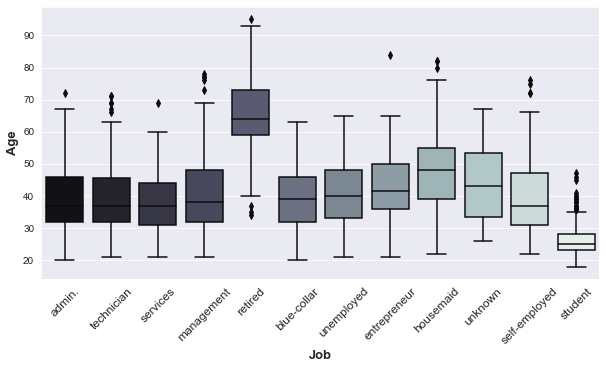

In [61]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1['job'], y=df1['age'], palette='bone')
plt.xlabel('Job', fontsize=13, weight='bold')
plt.ylabel('Age', fontsize=13, weight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.savefig('BM_44', bbox_inches='tight', dpi=150)
plt.show()

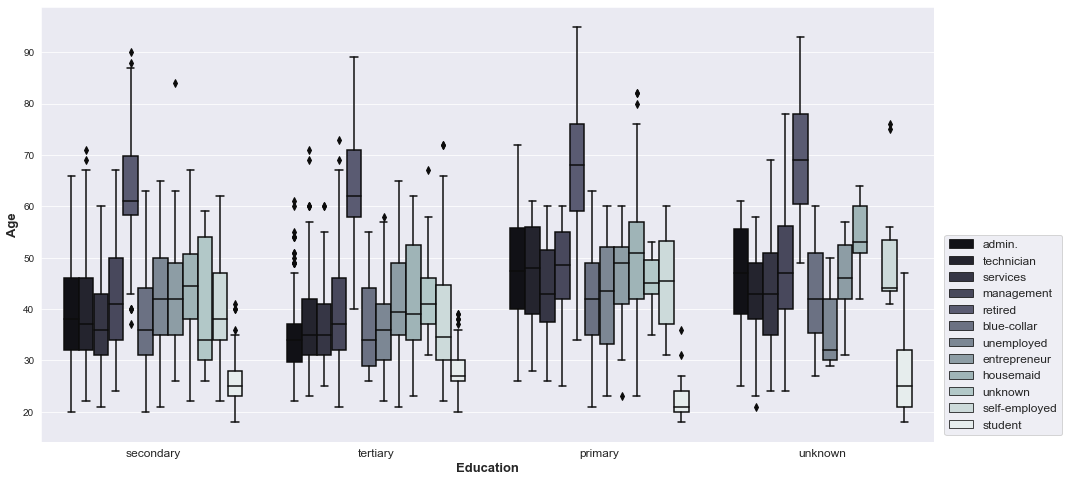

In [62]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df1['education'], y=df1['age'], hue=df1['job'], palette='bone')
plt.legend(loc='upper right', bbox_to_anchor=(1.15,0.49), fontsize=12)
plt.xlabel('Education', fontsize=13, weight='bold')
plt.ylabel('Age', fontsize=13, weight='bold')
plt.xticks(fontsize=12)
plt.savefig('BM_45', bbox_inches='tight', dpi=150)
plt.show()

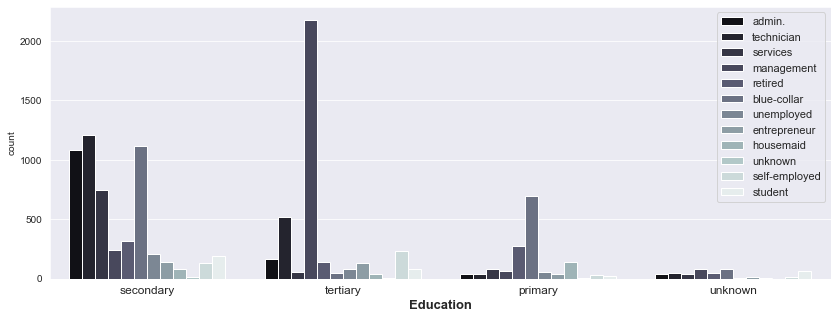

In [63]:
plt.figure(figsize=(14,5))
sns.countplot(hue=df1['job'], x=df1['education'], palette='bone')
plt.legend(loc='upper right', fontsize=11)
plt.xlabel('Education', fontsize=13, weight='bold')
plt.xticks(fontsize=12)
plt.savefig('BM_46', bbox_inches='tight', dpi=150)
plt.show()

依照年齡、教育程度兩變數與職業的關聯對職業的未知項進行更替。

In [64]:
df1['job'] = np.where((df1['job'] == 'unknown')&(df1['age'] <= 25), 'student', df1['job'])
df1['job'] = np.where((df1['job'] == 'unknown')&(df1['age'] >= 60), 'retired', df1['job'])
df1['job'] = np.where((df1['job'] == 'unknown')&(df1['education'] == 'secondary'), 'technician', df1['job'])
df1['job'] = np.where((df1['job'] == 'unknown')&(df1['education'] == 'tertiary'), 'management', df1['job'])
df1['job'] = np.where((df1['job'] == 'unknown')&(df1['education'] == 'primary'), 'blue-collar', df1['job'])

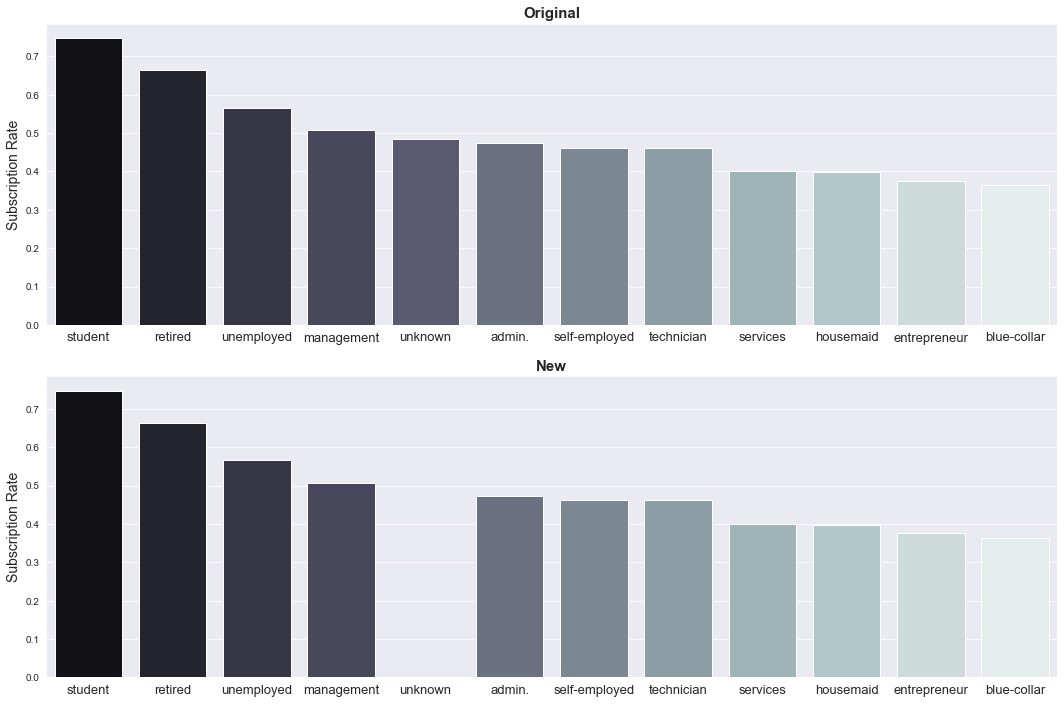

In [65]:
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.barplot(df['job'], df['deposit_01'], order=rate_job.index, ci=None, palette='bone')
plt.title('Original', fontsize=15, weight='bold')
plt.xlabel('')
plt.ylabel('Subscription Rate', fontsize=14)
plt.xticks(fontsize=13)
plt.subplot(212)
sns.barplot(df1['job'], df1['deposit_01'], order=rate_job.index, ci=None, palette='bone')
plt.title('New', fontsize=15, weight='bold')
plt.xlabel('')
plt.ylabel('Subscription Rate', fontsize=14)
plt.xticks(fontsize=13)
plt.tight_layout(pad=1.5)
plt.savefig('BM_47', bbox_inches='tight', dpi=150)
plt.show()

各職業的訂閱率在資料修正後沒有明顯改變，與原始資料一致。

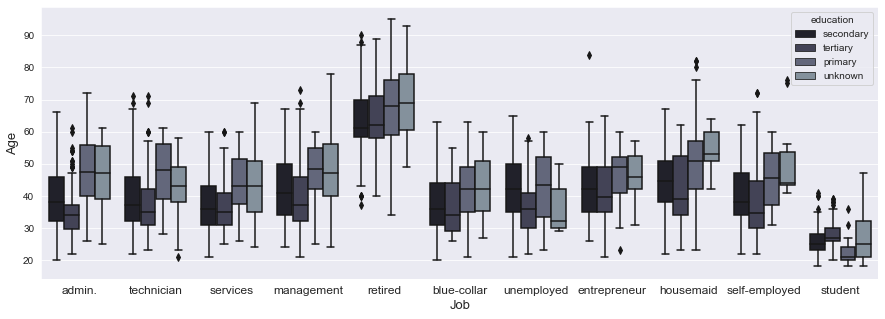

In [66]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df1['job'], y=df1['age'], hue=df1['education'])
plt.xlabel('Job', fontsize=13)
plt.ylabel('Age', fontsize=13)
plt.xticks(fontsize=12)
plt.savefig('BM_48', bbox_inches='tight', dpi=150)
plt.show()

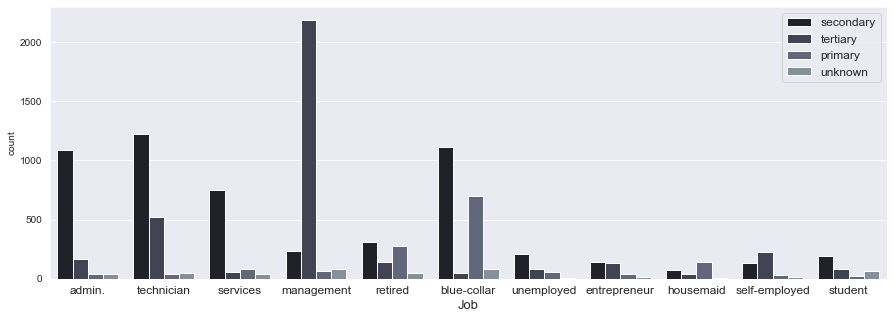

In [67]:
plt.figure(figsize=(15,5))
sns.countplot(x=df1['job'], hue=df1['education'])
plt.xlabel('Job', fontsize=13)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.savefig('BM_49', bbox_inches='tight', dpi=150)
plt.show()

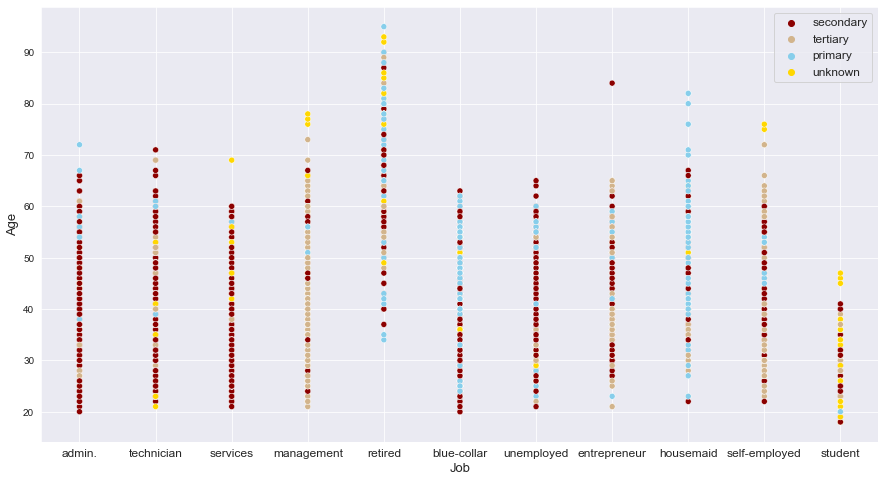

In [68]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df1['job'], y=df1['age'], hue=df1['education'], palette=['darkred','tan','skyblue','gold'])
plt.xlabel('Job', fontsize=13)
plt.ylabel('Age', fontsize=13)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.savefig('BM_50', bbox_inches='tight', dpi=150)
plt.show()

依照年齡、職業兩變數與教育程度的關聯對教育程度的未知項進行更替。

In [69]:
df1['education'][df1['education'] == 'unknown'] = np.where(df1['job'].isin(['admin.','technician','services',
                                                                            'unemployed','entrepreneur','student']),
                                                           'secondary',
                                                           'unknown')

df1['education'][df1['education'] == 'unknown'] = np.where(df1['job'].isin(['housemaid','retired','blue-collar']),
                                                           'primary',
                                                           'unknown')

df1['education'][df1['education'] == 'unknown'] = np.where(df1['job'].isin(['management','self-employed']),
                                                           'tertiary',
                                                           'unknown')

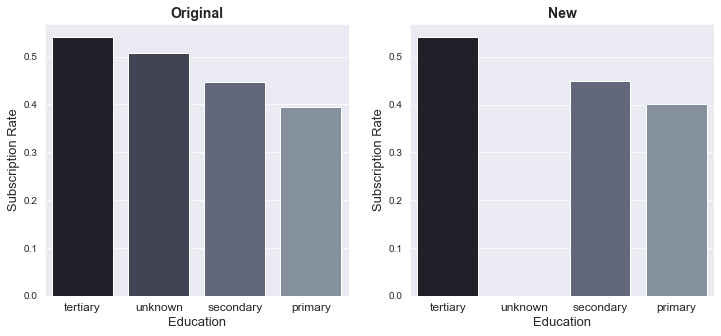

In [70]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.barplot(df['education'], df['deposit_01'], order=rate_edu.index, ci=None)
plt.title('Original', fontsize=14, weight='bold')
plt.xlabel('Education', fontsize=13)
plt.ylabel('Subscription Rate', fontsize=13)
plt.xticks(fontsize=12)
plt.subplot(122)
sns.barplot(df1['education'], df1['deposit_01'], order=rate_edu.index, ci=None)
plt.title('New', fontsize=14, weight='bold')
plt.xlabel('Education', fontsize=13)
plt.ylabel('Subscription Rate', fontsize=13)
plt.xticks(fontsize=12)
plt.savefig('BM_51', bbox_inches='tight', dpi=150)
plt.show()

教育程度的訂閱率在資料修正後沒有明顯改變，與原始資料一致。

##### Removing Outliers

In [71]:
for i in ['balance','duration','campaign','previous']:
    display(df1[i].groupby(df1['deposit']).describe())

,count,mean,std,min,25%,50%,75%,max
deposit,,,,,,,,
no,5852.0,1280.338517,2937.081116,-6847.0,64.0,414.0,1321.25,66653.0
yes,5271.0,1799.365585,3491.216385,-3058.0,207.5,732.0,2157.50,81204.0


,count,mean,std,min,25%,50%,75%,max
deposit,,,,,,,,
no,5852.0,223.232912,208.584296,2.0,94.0,163.0,282.0,3284.0
yes,5271.0,537.482261,392.659849,8.0,243.5,426.0,725.0,3881.0


,count,mean,std,min,25%,50%,75%,max
deposit,,,,,,,,
no,5852.0,2.835099,3.241118,1.0,1.0,2.0,3.0,63.0
yes,5271.0,2.140770,1.920209,1.0,1.0,2.0,3.0,32.0


,count,mean,std,min,25%,50%,75%,max
deposit,,,,,,,,
no,5852.0,0.529733,1.982655,0.0,0.0,0.0,0.0,41.0
yes,5271.0,1.171884,2.556098,0.0,0.0,0.0,2.0,58.0


將變數以定存與否區分，再依平均數+/-三倍標準差之方式剔除離群值。

In [72]:
def outlier(data, group):
    mean = data.groupby(group).mean()
    std = data.groupby(group).std()
    upper = mean + std * 3
    lower = mean - std * 3
    return upper, lower

In [73]:
out_col = ['balance','duration','campaign','previous']
display(outlier(df1[out_col], df1['deposit'])[0])
display(outlier(df1[out_col], df1['deposit'])[1])

,balance,duration,campaign,previous
deposit,,,,
no,10091.581866,848.985800,12.558454,6.477700
yes,12273.014741,1715.461809,7.901396,8.840179


,balance,duration,campaign,previous
deposit,,,,
no,-7530.904832,-402.519976,-6.888256,-5.418233
yes,-8674.283571,-640.497286,-3.619855,-6.496411


In [74]:
for i in range(4):
    df1 = df1.drop(df1[(df1['deposit']=='yes')&
                          (df1[out_col[i]] > outlier(df1[out_col], df1['deposit'])[0].iloc[1,i])].index,axis=0)

for i in range(4):
    df1 = df1.drop(df1[(df1['deposit']=='no')&
                          (df1[out_col[i]] > outlier(df1[out_col], df1['deposit'])[0].iloc[0,i])].index,axis=0)
    
for i in range(4):
    df1 = df1.drop(df1[(df1['deposit']=='yes')&
                          (df1[out_col[i]] < outlier(df1[out_col], df1['deposit'])[1].iloc[1,i])].index,axis=0)

for i in range(4):
    df1 = df1.drop(df1[(df1['deposit']=='no')&
                          (df1[out_col[i]] < outlier(df1[out_col], df1['deposit'])[1].iloc[0,i])].index,axis=0)

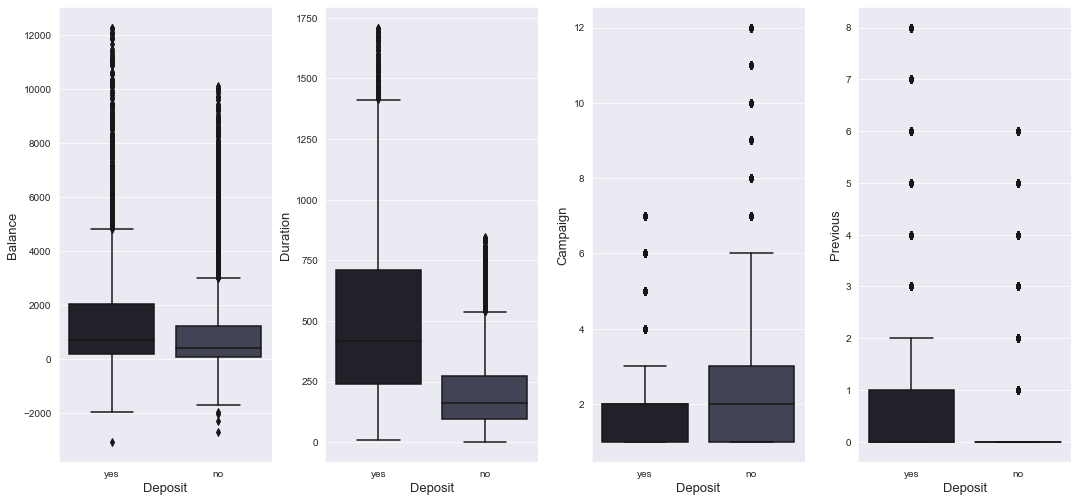

In [75]:
plt.figure(figsize=(15,7))
for i in range(len(out_col)):
    plt.subplot(1,4,i+1)
    sns.boxplot(x=df1['deposit'], y=df1[out_col[i]])
    plt.ylabel(out_col[i].capitalize(), fontsize=13)
    plt.xlabel('Deposit', fontsize=13)
plt.tight_layout(pad=0.8)
plt.savefig('BM_52', bbox_inches='tight', dpi=150)
plt.show()

In [76]:
df1 = df1[['deposit', 'age', 'balance', 'duration', 'job', 'marital', 'education', 'default', 'housing',
           'loan', 'contact', 'month', 'campaign', 'pdays','previous', 'poutcome']]

##### Converting Categorical Data

In [77]:
df1['education'].replace({'primary':1, 'secondary':2, 'tertiary':3}, inplace=True)

In [78]:
pd.get_dummies(df1)

,age,balance,duration,education,campaign,pdays,previous,deposit_no,deposit_yes,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,1042,2,1,-1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,56,45,1467,2,1,-1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,41,1270,1389,2,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,55,2476,579,2,1,-1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,54,184,673,3,2,-1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,1,-1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11158,39,733,83,2,4,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
11159,32,29,156,2,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11160,43,0,9,2,2,172,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [79]:
df1 = pd.get_dummies(df1).drop(['deposit_no','job_admin.','marital_single','default_no','housing_no',
                                'loan_no','contact_unknown','month_jan','poutcome_unknown'],
                               axis=1)
df1

,age,balance,duration,education,campaign,pdays,previous,deposit_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,default_yes,housing_yes,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,59,2343,1042,2,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,56,45,1467,2,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,41,1270,1389,2,1,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,55,2476,579,2,1,-1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,54,184,673,3,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11158,39,733,83,2,4,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
11159,32,29,156,2,2,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
11160,43,0,9,2,2,172,5,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
df1['pdays'] = np.where(df1['pdays'] == -1, df1['pdays'].max()+1, df1['pdays'])

在pdays變數中，-1表示此行銷活動前從未接過行銷電話，故以pdays最大值+1來替代該值。

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [82]:
def VIF(data):
    variables = data.drop('deposit_yes', axis=1).columns.to_list()
    x = data[variables]
    x = add_constant(x)
    vif = pd.DataFrame()
    vif['features'] = x.columns
        
    vif['VIF'] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]

    vif = vif[vif['features']!='const']
    return vif

VIF(df1).sort_values('VIF', ascending = False)

,features,VIF
6,pdays,24.961310
38,poutcome_success,13.598995
36,poutcome_failure,12.322965
32,month_may,7.878151
37,poutcome_other,6.276496
29,month_jul,4.820593
26,month_aug,4.803129
30,month_jun,4.541757
33,month_nov,3.526594
25,month_apr,3.513396


在共線性檢定中，以VIF值(變異數膨脹因子)是否大於10作為判定標準，上表指出"pdays", "poutcome_success", "poutcome_failure"此三項變數之VIF皆大於10，將先剔除"pdays"後再檢視是否還存在共線性問題。

In [83]:
df1.drop('pdays', axis=1, inplace=True)

In [84]:
VIF(df1).sort_values('VIF', ascending = False)

,features,VIF
31,month_may,7.866974
28,month_jul,4.815553
25,month_aug,4.800143
29,month_jun,4.540524
32,month_nov,3.521872
24,month_apr,3.509631
27,month_feb,3.064149
6,previous,2.759002
10,job_management,2.685252
22,contact_cellular,2.301183


將"pdays"變數移除後，所有變數之VIF皆小於10。

In [85]:
df2 = df1.copy()

### Modeling

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

scaler = StandardScaler()

In [87]:
X = df2.drop('deposit_yes', axis=1)
y = df2['deposit_yes']

scale_col = ['age','balance','duration','campaign','previous']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [90]:
X_train_scaled = np.hstack((scaler.fit_transform(X_train[scale_col]),np.array(X_train.drop(scale_col, axis = 1))))
X_test_scaled = np.hstack((scaler.fit_transform(X_test[scale_col]),np.array(X_test.drop(scale_col, axis = 1))))

In [93]:
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=10)
log_reg_mean = log_scores.mean()

svc = SVC()
svc_scores = cross_val_score(svc, X_train_scaled, y_train, cv=10)
svc_mean = svc_scores.mean()

knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, X_train_scaled, y_train, cv=10)
knn_mean = knn_scores.mean()

tree = DecisionTreeClassifier()
tree_scores = cross_val_score(tree, X_train, y_train, cv=10)
tree_mean = tree_scores.mean()

gb = GradientBoostingClassifier()
gb_scores = cross_val_score(gb, X_train, y_train, cv=10)
gb_mean = gb_scores.mean()

rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, X_train, y_train, cv=10)
rf_mean = rf_scores.mean()

result = {'Models':['Logistic Regression',
                    'SVC',
                    'KNN',
                    'Decision Tree',
                    'GradientBoosting',
                    'Random Forest'], 
          'Mean Scores':[log_reg_mean,
                         svc_mean,
                         knn_mean,
                         tree_mean,
                         gb_mean,
                         rf_mean]}

train_score_df = pd.DataFrame(result)

In [94]:
train_score_df.sort_values(by=['Mean Scores'], ascending=False)

,Models,Mean Scores
5,Random Forest,0.853226
4,GradientBoosting,0.851161
1,SVC,0.845921
0,Logistic Regression,0.835995
2,KNN,0.805258
3,Decision Tree,0.792586


在6種模型之中隨機森林的表現最佳，故以隨機森林作為最後的模型選擇，後續將進行參數調整及模型驗證。

In [95]:
from sklearn.model_selection import GridSearchCV

In [99]:
rf = RandomForestClassifier(n_jobs=-1)

gs_param = {'n_estimators':range(50,251,50),
            'max_features':[0.3,0.5,'sqrt',None],
            'max_depth':[10,20,30,None],
            'max_samples':[0.6,0.65,0.7,0.75,0.8]}

rf_gscv = GridSearchCV(rf, gs_param, cv=5, n_jobs=-1)

In [100]:
rf_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': [0.3, 0.5, 'sqrt', None],
                         'max_samples': [0.6, 0.65, 0.7, 0.75, 0.8],
                         'n_estimators': range(50, 251, 50)})

In [101]:
rf_gscv.best_estimator_

RandomForestClassifier(max_depth=20, max_features='sqrt', max_samples=0.65,
                       n_estimators=250, n_jobs=-1)

In [102]:
RF_model = RandomForestClassifier(n_estimators=250,
                                  max_features='sqrt',
                                  max_depth=20,
                                  max_samples=0.65,
                                  random_state=42)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
print('Train Score:', RF_model.score(X_train, y_train))
print('Test Score:', accuracy_score(y_test, y_pred))

Train Score: 0.9818081587651599
Test Score: 0.862700964630225


In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1615
           1       0.85      0.87      0.86      1495

    accuracy                           0.86      3110
   macro avg       0.86      0.86      0.86      3110
weighted avg       0.86      0.86      0.86      3110



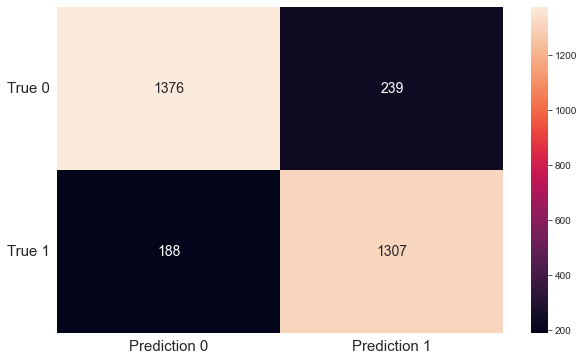

In [104]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            annot_kws={'size':14},
            fmt='d',
            xticklabels=['Prediction 0', 'Prediction 1'],
            yticklabels=['True 0', 'True 1'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15, rotation=360)
plt.show()

此模型的整體準確度達86.3%，預測為1(選擇訂閱)及預測為0(拒絕訂閱)在精確率與召回率的部分分別為85%/87%、88%/85%。